# Sartorious experiments data-plotting code

In [1]:
# Importing python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

# Importing files
std = '204'
folder = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Opentrons_experiments\BOTorch_optimization\VS_code_csv")

df_cal = pd.read_csv(folder+r'/Viscosity_std_'+std+'_exp3_withacq.csv')

df_cal.dtypes


liquid              object
pipette             object
volume              object
aspiration_rate    float64
dispense_rate      float64
blow_out_rate        int64
delay_aspirate       int64
delay_dispense       int64
delay_blow_out       int64
%error             float64
time_asp_1000      float64
acq_value          float64
dtype: object

In [2]:
# Calculate time for 1000ul
df_cal['time_for_1000'] = 1000/df_cal["aspiration_rate"] + 1000/df_cal["dispense_rate"] + df_cal["delay_aspirate"] + df_cal["delay_dispense"] + df_cal["delay_blow_out"]
print(df_cal.head())
# Getting unique values of time in a numpy array
TM = df_cal['time_for_1000'].unique()
TM

              liquid pipette                volume  aspiration_rate  \
0  Viscosity_std_204   p1000                1000.0        89.911952   
1  Viscosity_std_204   p1000                 500.0        89.911952   
2  Viscosity_std_204   p1000                 300.0        89.911952   
3  Viscosity_std_204   p1000  mean[300, 500, 1000]        89.911952   
4  Viscosity_std_204   p1000                1000.0       112.389940   

   dispense_rate  blow_out_rate  delay_aspirate  delay_dispense  \
0      89.911952              0               5               5   
1      89.911952              0               5               5   
2      89.911952              0               5               5   
3      89.911952              0               5               5   
4       8.991195              0               5               5   

   delay_blow_out     %error  time_asp_1000  acq_value  time_for_1000  
0               0 -10.047459      32.243984        NaN      32.243984  
1               0  -5.3131

array([ 32.24398375, 130.11751223,  27.795187  , 232.43983746,
        48.62309007,  56.56025544,  44.482948  ,  48.79111904,
        38.72327839])

In [3]:
# Assigning iterations to each TM value and applying iterations to form a new column in df_cal
iteration = 1
iteration_dict = {}
iteration_list = []

for item in TM:
    iteration_dict[item] = iteration
    iteration += 1
#print(iteration_dict)

count=0
for value in df_cal['time_for_1000']:
    count+=1
    if count>=13 and count<=16:
        iteration_list.append(iteration_dict[value]+2)
        continue
    elif count > 16:
        iteration_list.append(iteration_dict[value]+1)
        continue
    else:
        iteration_list.append(iteration_dict[value])
print(iteration_list)

df_cal['iteration'] = iteration_list
df_cal

[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10]


,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,time_for_1000,iteration
0,Viscosity_std_204,p1000,1000.0,89.911952,89.911952,0,5,5,0,-10.047459,32.243984,NaN,32.243984,1
1,Viscosity_std_204,p1000,500.0,89.911952,89.911952,0,5,5,0,-5.313115,32.243984,NaN,32.243984,1
2,Viscosity_std_204,p1000,300.0,89.911952,89.911952,0,5,5,0,-5.698962,32.243984,NaN,32.243984,1
3,Viscosity_std_204,p1000,"mean[300, 500, 1000]",89.911952,89.911952,0,5,5,0,-7.019845,32.243984,NaN,32.243984,1
4,Viscosity_std_204,p1000,1000.0,112.389940,8.991195,0,5,5,0,2.812826,130.117512,NaN,130.117512,2
5,Viscosity_std_204,p1000,500.0,112.389940,8.991195,0,5,5,0,4.734344,130.117512,NaN,130.117512,2
6,Viscosity_std_204,p1000,300.0,112.389940,8.991195,0,5,5,0,3.599954,130.117512,NaN,130.117512,2
7,Viscosity_std_204,p1000,"mean[300, 500, 1000]",112.389940,8.991195,0,5,5,0,-3.715708,130.117512,NaN,130.117512,2
8,Viscosity_std_204,p1000,1000.0,112.389940,112.389940,0,5,5,0,-12.026855,27.795187,NaN,27.795187,3
9,Viscosity_std_204,p1000,500.0,112.389940,112.389940,0,5,5,0,-7.211483,27.795187,NaN,27.795187,3


#### Making a scatterplot

In [4]:
df_cal_mean = df_cal.loc[(df_cal['volume'] == "mean[300, 500, 1000]")]
df_cal_int = df_cal.loc[(df_cal['volume'] != "mean[300, 500, 1000]")]
df_cal_int["volume"] = df_cal_int["volume"].apply(pd.to_numeric)
df_cal_int.dtypes
df_cal_1000 = df_cal_int.loc[(df_cal_int['volume'] == 1000)]
df_cal_500 = df_cal_int.loc[(df_cal_int['volume'] == 500)]
df_cal_300 = df_cal_int.loc[(df_cal_int['volume'] == 300)]
df_cal_100 = df_cal_int.loc[(df_cal_int['volume'] == 100)]

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20472\993082402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_int["volume"] = df_cal_int["volume"].apply(pd.to_numeric)


,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,time_for_1000,iteration


In [18]:
df_cal_mean.head(10)

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,time_for_1000,iteration
3,Viscosity_std_204,p1000,"mean[300, 500, 1000]",89.911952,89.911952,0,5,5,0,-7.019845,32.243984,NaN,32.243984,1
7,Viscosity_std_204,p1000,"mean[300, 500, 1000]",112.389940,8.991195,0,5,5,0,-3.715708,130.117512,NaN,130.117512,2
11,Viscosity_std_204,p1000,"mean[300, 500, 1000]",112.389940,112.389940,0,5,5,0,-7.823694,27.795187,NaN,27.795187,3
15,Viscosity_std_204,p1000,"mean[300, 500, 1000]",8.991195,112.389940,0,5,5,0,-7.142030,130.117512,NaN,130.117512,4
19,Viscosity_std_204,p1000,"mean[300, 500, 1000]",8.991195,8.991195,0,5,5,0,-5.620506,232.439837,NaN,232.439837,5
23,Viscosity_std_204,p1000,"mean[300, 500, 1000]",98.504223,35.123162,0,5,5,0,-2.034701,48.623090,11.030108,48.623090,6
27,Viscosity_std_204,p1000,"mean[300, 500, 1000]",78.136789,29.618935,0,5,5,0,-2.430837,56.560255,12.460163,56.560255,7
31,Viscosity_std_204,p1000,"mean[300, 500, 1000]",93.316186,42.075689,0,5,5,0,-2.460418,44.482948,11.431273,44.482948,8
35,Viscosity_std_204,p1000,"mean[300, 500, 1000]",89.826762,36.155147,0,5,5,0,-3.052051,48.791119,5.187350,48.791119,9
39,Viscosity_std_204,p1000,"mean[300, 500, 1000]",110.673791,50.793095,0,5,5,0,-1.619272,38.723278,6.048130,38.723278,10


In [21]:
for i in range(len(df_cal_mean)):
    df_cal_mean["%error"].iloc[i]=(df_cal_1000["%error"].iloc[i]+df_cal_500["%error"].iloc[i]+df_cal_300["%error"].iloc[i])/3
df_cal_mean.head(10)

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20472\368676123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_mean["%error"].iloc[i]=(df_cal_1000["%error"].iloc[i]+df_cal_500["%error"].iloc[i]+df_cal_300["%error"].iloc[i])/3


,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,time_for_1000,iteration
3,Viscosity_std_204,p1000,"mean[300, 500, 1000]",89.911952,89.911952,0,5,5,0,-7.019845,32.243984,NaN,32.243984,1
7,Viscosity_std_204,p1000,"mean[300, 500, 1000]",112.389940,8.991195,0,5,5,0,3.715708,130.117512,NaN,130.117512,2
11,Viscosity_std_204,p1000,"mean[300, 500, 1000]",112.389940,112.389940,0,5,5,0,-7.823694,27.795187,NaN,27.795187,3
15,Viscosity_std_204,p1000,"mean[300, 500, 1000]",8.991195,112.389940,0,5,5,0,-7.142030,130.117512,NaN,130.117512,4
19,Viscosity_std_204,p1000,"mean[300, 500, 1000]",8.991195,8.991195,0,5,5,0,5.620506,232.439837,NaN,232.439837,5
23,Viscosity_std_204,p1000,"mean[300, 500, 1000]",98.504223,35.123162,0,5,5,0,0.321539,48.623090,11.030108,48.623090,6
27,Viscosity_std_204,p1000,"mean[300, 500, 1000]",78.136789,29.618935,0,5,5,0,1.566539,56.560255,12.460163,56.560255,7
31,Viscosity_std_204,p1000,"mean[300, 500, 1000]",93.316186,42.075689,0,5,5,0,0.399995,44.482948,11.431273,44.482948,8
35,Viscosity_std_204,p1000,"mean[300, 500, 1000]",89.826762,36.155147,0,5,5,0,1.408342,48.791119,5.187350,48.791119,9
39,Viscosity_std_204,p1000,"mean[300, 500, 1000]",110.673791,50.793095,0,5,5,0,-1.619272,38.723278,6.048130,38.723278,10


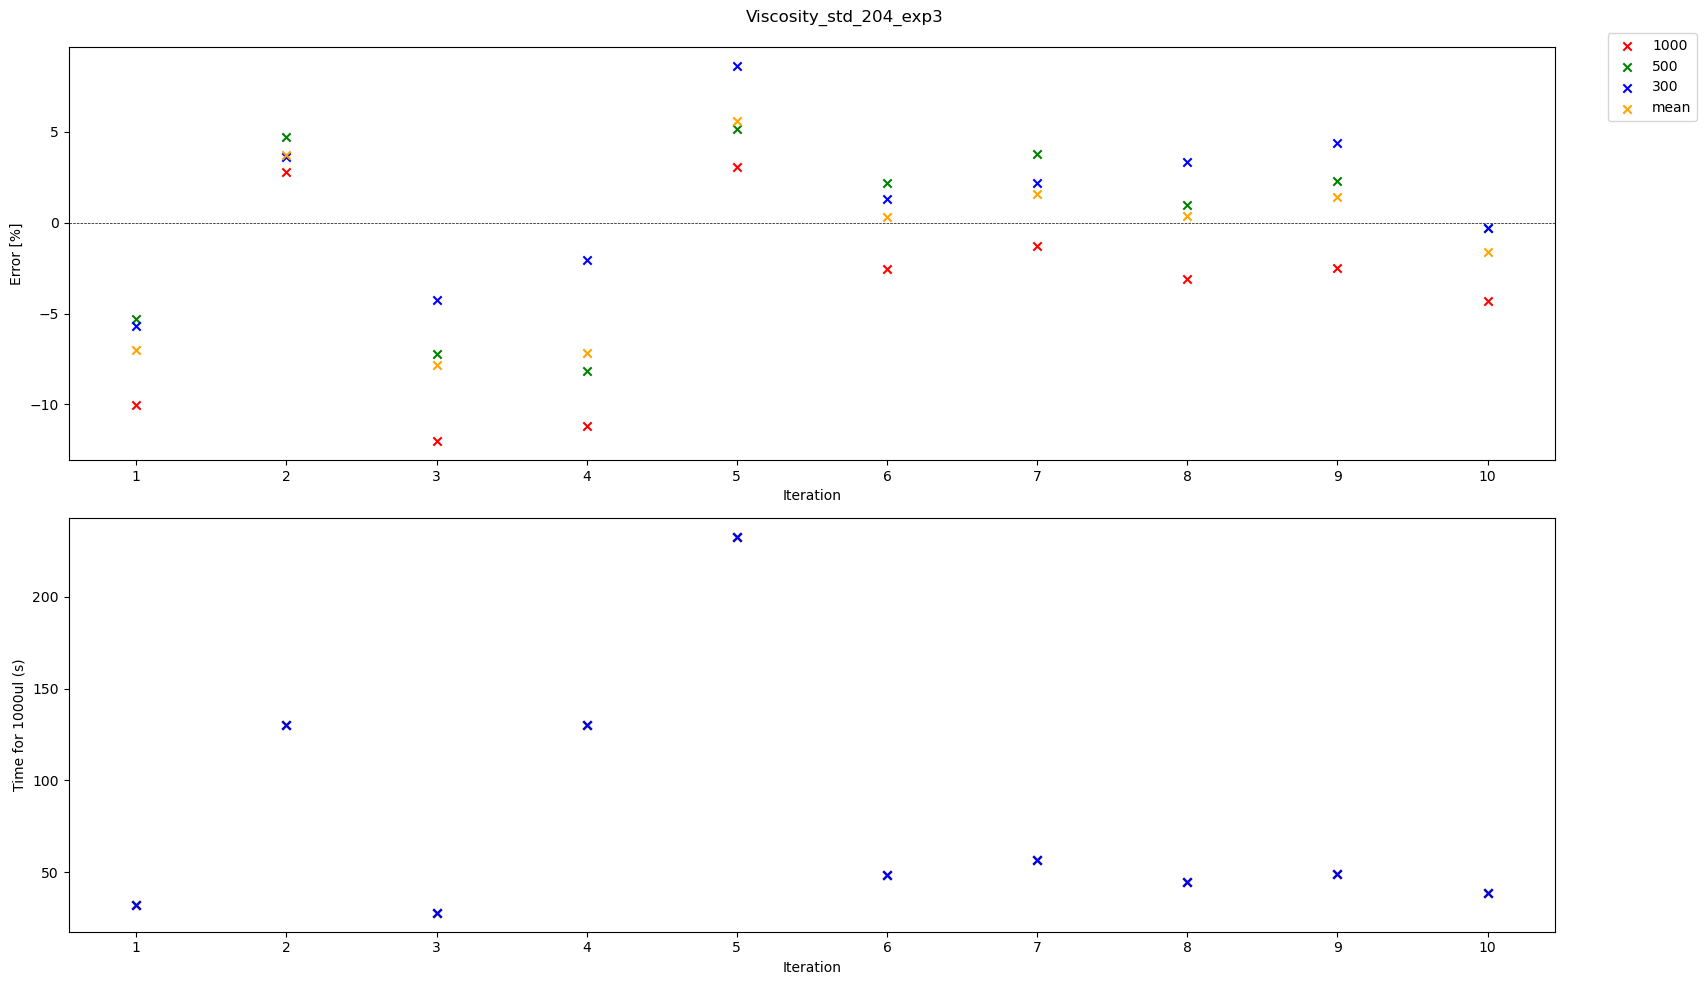

In [86]:
# Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

"""# Dropping NAN rows
df_cal_1000 = df_cal.where(df_cal.volume==1000).dropna(how='all')
df_cal_500 = df_cal.where(df_cal.volume==500).dropna(how='all')
df_cal_300 = df_cal.where(df_cal.volume==300).dropna(how='all')
df_cal_100 = df_cal.where(df_cal.volume==100).dropna(how='all')"""

# Plotting graph 1: Iteration against error
axs[0].scatter(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
axs[0].scatter(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500', c = 'green')
axs[0].scatter(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300', c = 'blue')
axs[0].scatter(df_cal_mean['iteration'],df_cal_mean['%error'], marker= 'x', label = 'mean', c = 'orange')

# Setting graph 1 labels
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

# Plotting graph 2: Iteration against Time
axs[1].scatter(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], marker= 'x', label = 'mean', c = 'orange')
axs[1].scatter(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', label = '1000', c = 'red')
axs[1].scatter(df_cal_500['iteration'],df_cal_500['time_for_1000'], marker= 'x', label = '500', c = 'green')
axs[1].scatter(df_cal_300['iteration'],df_cal_300['time_for_1000'], marker= 'x', label = '300', c = 'blue')

# Setting graph 2 labels
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

#Formatting subplots
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig.set_size_inches(17, 10)
fig.suptitle('Viscosity_std_'+std+'_exp3')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')

folder1 = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Opentrons_experiments\BOTorch_optimization\VS_code_csv\graphs")
fig.savefig(folder1+r'/'+'Viscosity_std_'+std+'_updated.png')



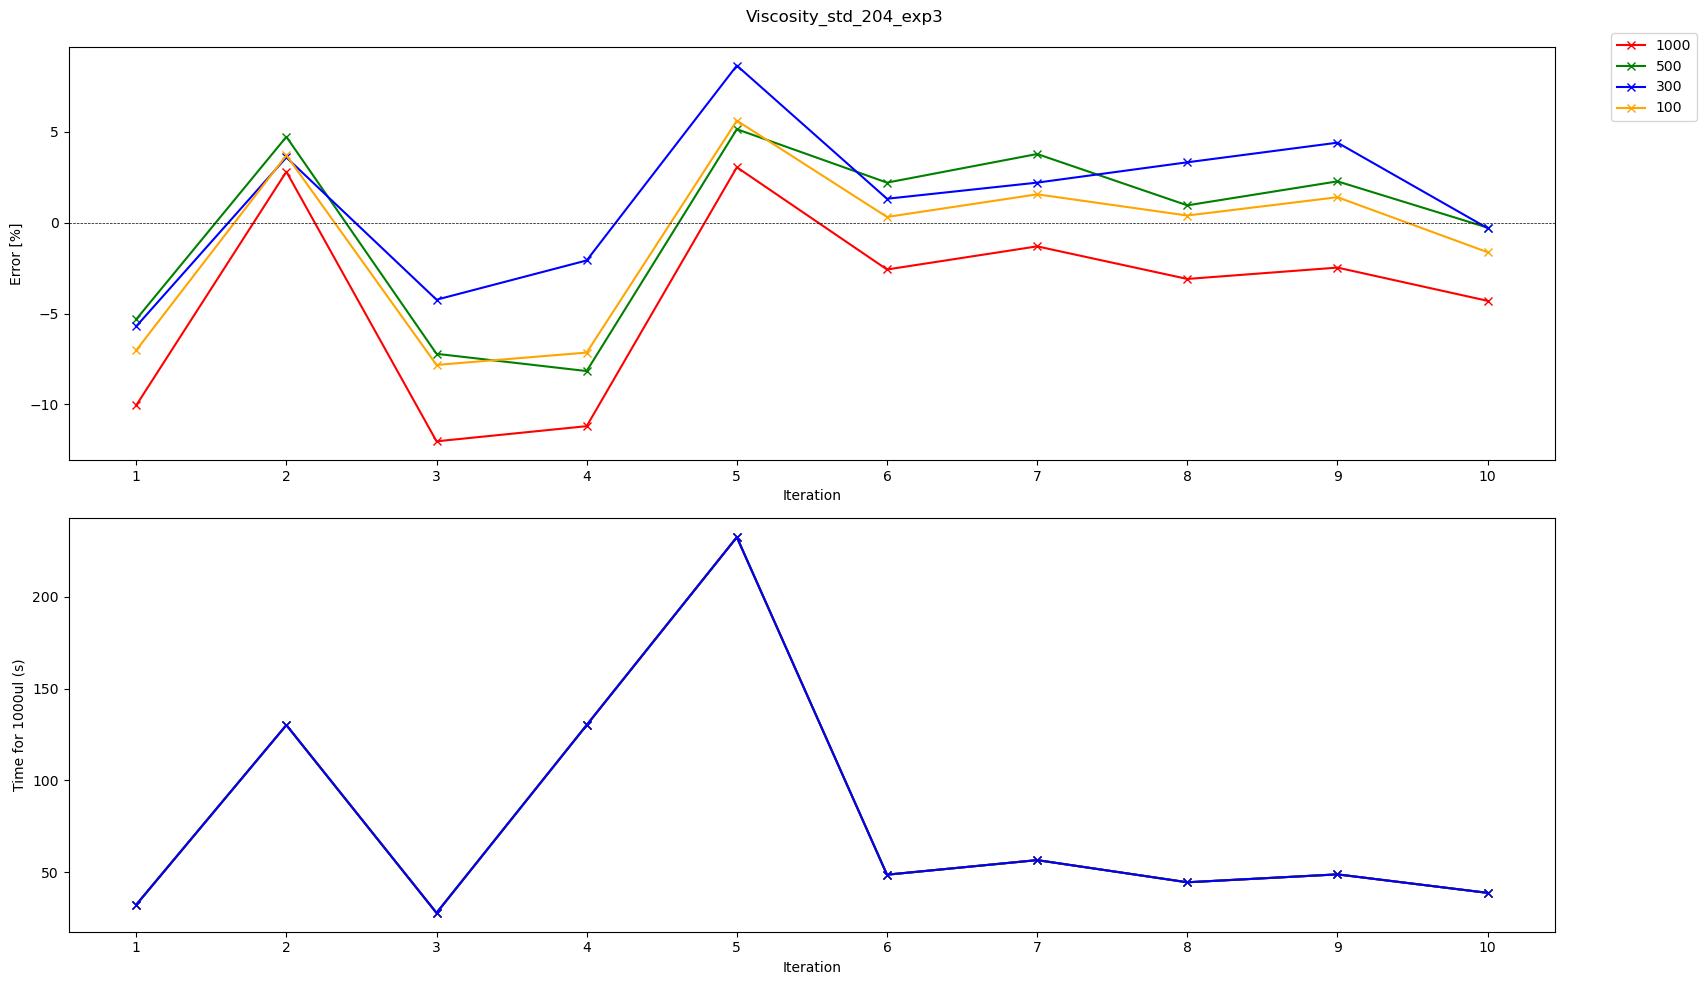

In [87]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

"""# Dropping NAN rows
df_cal_1000 = df_cal.where(df_cal.volume==1000).dropna(how='all')
df_cal_500 = df_cal.where(df_cal.volume==500).dropna(how='all')
df_cal_300 = df_cal.where(df_cal.volume==300).dropna(how='all')
df_cal_100 = df_cal.where(df_cal.volume==100).dropna(how='all')
"""
# Plotting graph 1: Iteration against error
axs[0].plot(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
axs[0].plot(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500', c = 'green')
axs[0].plot(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300', c = 'blue')
axs[0].plot(df_cal_mean['iteration'],df_cal_mean['%error'], marker= 'x', label = '100', c = 'orange')

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

axs[1].plot(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], marker= 'x', label = '300', c = 'orange')
axs[1].plot(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', c = 'red')
axs[1].plot(df_cal_500['iteration'],df_cal_500['time_for_1000'], marker= 'x', label = '500', c = 'green')
axs[1].plot(df_cal_300['iteration'],df_cal_300['time_for_1000'], marker= 'x', label = '300', c = 'blue')


axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(17, 10)
fig.suptitle('Viscosity_std_'+std+'_exp3')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()

axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')
fig.savefig(folder1+r'/'+'Viscosity_std_'+std+'_scatter_updated.png')


In [69]:
folder2 = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Std_calibrations")

df_calibrations = pd.read_csv(folder2+r'/Viscosity_std_'+std+'.csv')

calibration_drop=df_calibrations.drop_duplicates(subset=["volume","aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"], keep='first')
calibration_drop['time_for_1000'] = 1000/calibration_drop["aspiration_rate"] + 1000/calibration_drop["dispense_rate"] + calibration_drop["delay_aspirate"] + calibration_drop["delay_dispense"] + calibration_drop["delay_blow_out"]
calibration_drop

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20472\3155465495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_drop['time_for_1000'] = 1000/calibration_drop["aspiration_rate"] + 1000/calibration_drop["dispense_rate"] + calibration_drop["delay_aspirate"] + calibration_drop["delay_dispense"] + calibration_drop["delay_blow_out"]


,liquid,Viscosity 900 s-1,Viscosity 100 s-1,Viscosity 10 s-1,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,touch_tip_aspirate,touch_tip_dispense,time,%error,m_measured,m_expected,time_for_1000
0,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000,70,70,0,0.00,0,0,True,False,34.215777,-10.313694,0.7748,0.86390,28.571429
1,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000,70,70,5,0.00,0,0,True,False,60.686448,-0.266235,0.8616,0.86390,28.571429
3,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000,68,70,5,0.00,0,0,True,False,61.887612,-3.623105,0.8326,0.86390,28.991597
4,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000,70,70,5,5.00,0,0,True,False,66.569751,2.859127,0.8886,0.86390,33.571429
5,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000,70,70,5,2.50,0,0,True,False,64.114524,0.972335,0.8723,0.86390,31.071429
7,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000,70,70,5,2.00,0,0,True,False,63.622335,2.106725,0.8821,0.86390,30.571429
8,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000,70,70,5,1.50,0,0,True,False,63.215145,1.597407,0.8777,0.86390,30.071429
9,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000,70,70,5,1.00,0,0,True,False,62.691491,0.150480,0.8652,0.86390,29.571429
11,Viscosity_std_204.8,204.8,204.8,204.8,p1000,500,70,70,5,1.00,0,0,True,False,48.440264,5.614076,0.4562,0.43195,29.571429
12,Viscosity_std_204.8,204.8,204.8,204.8,p1000,500,70,70,5,0.50,0,0,True,False,48.039649,-0.173631,0.4312,0.43195,29.071429


In [70]:
calibration_1000 = calibration_drop.loc[(calibration_drop['volume'] == 1000)]
calibration_500 = calibration_drop.loc[(calibration_drop['volume'] == 500)]
calibration_300 = calibration_drop.loc[(calibration_drop['volume'] == 300)]
count = 1
calibration_1000['iteration']=0
calibration_500['iteration']=0
calibration_300['iteration']=0
for i in range(len(calibration_1000)):
    calibration_1000['iteration'].iloc[i]=count
    count+=1
count = 1
for i in range(len(calibration_500)):
    calibration_500['iteration'].iloc[i]=count
    count+=1
count = 1
for i in range(len(calibration_300)):
    calibration_300['iteration'].iloc[i]=count
    count+=1

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20472\2344505822.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_1000['iteration']=0
C:\Users\Shivam\AppData\Local\Temp\ipykernel_20472\2344505822.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_500['iteration']=0
C:\Users\Shivam\AppData\Local\Temp\ipykernel_20472\2344505822.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

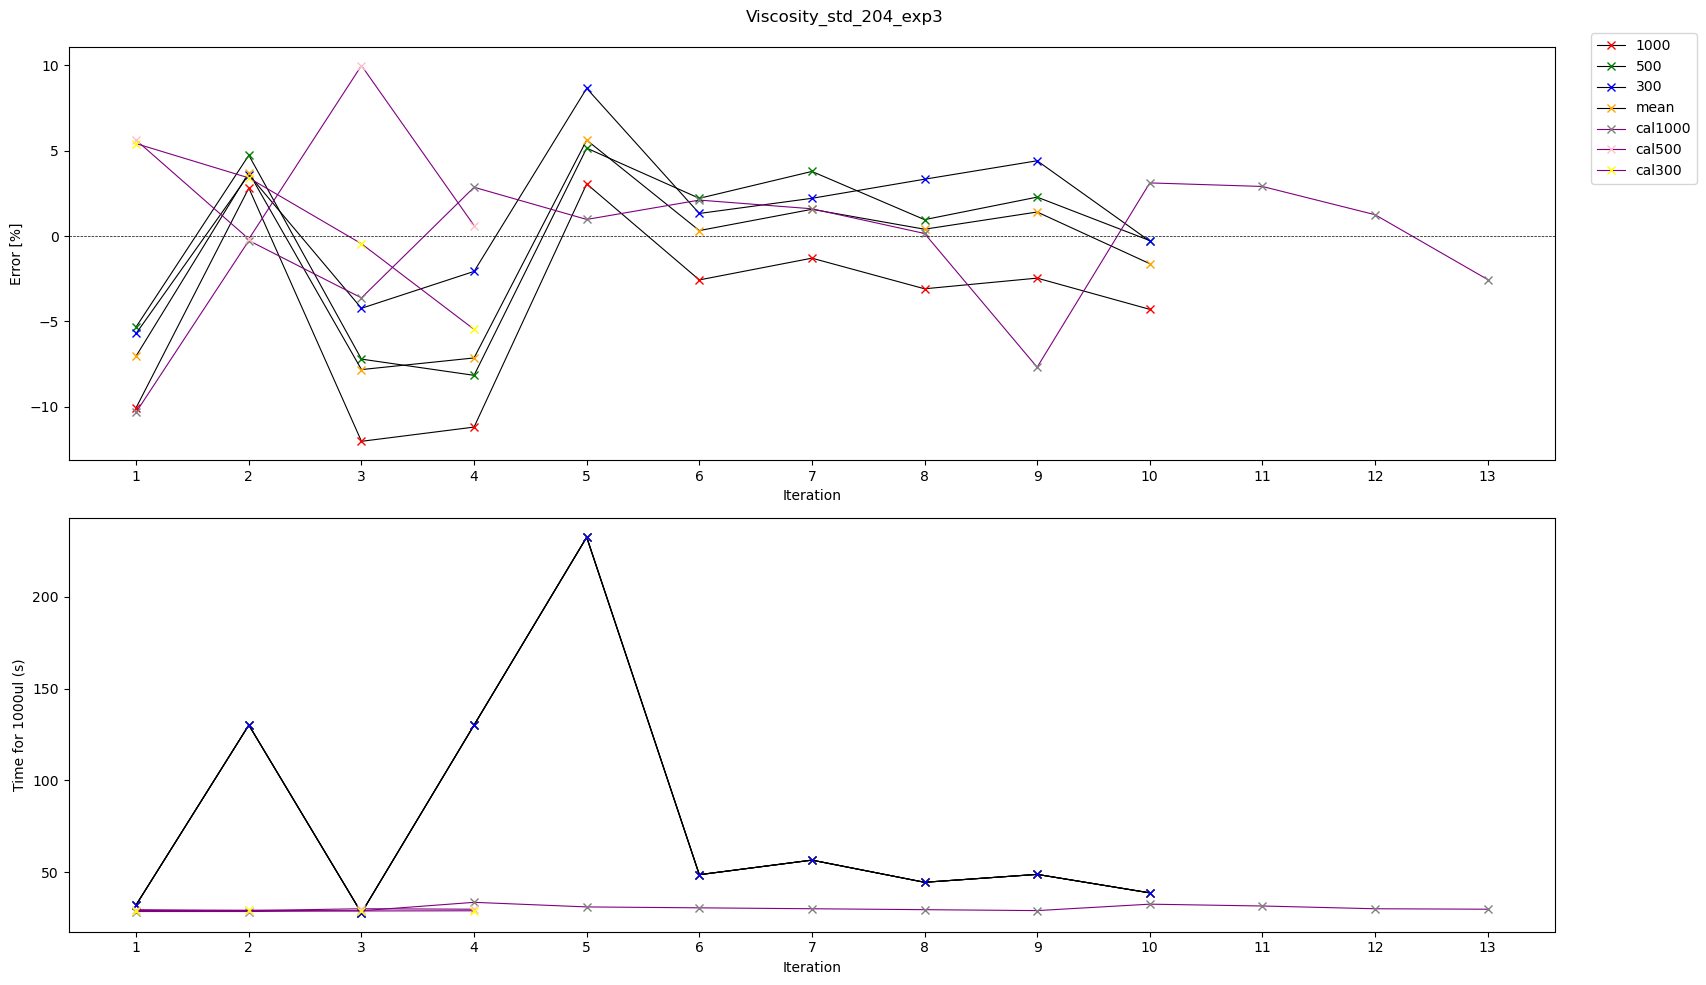

In [93]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Plotting graph 1: Iteration against error
axs[0].plot(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'black', mec="red", linewidth=0.8)
axs[0].plot(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500', c = 'black', mec="green", linewidth=0.8)
axs[0].plot(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300', c = 'black', mec="blue", linewidth=0.8)
axs[0].plot(df_cal_mean['iteration'],df_cal_mean['%error'], marker= 'x', label = 'mean', c = 'black', mec="orange", linewidth=0.8)
axs[0].plot(calibration_1000['iteration'],calibration_1000['%error'], marker= 'x', label = 'cal1000', c = 'purple', mec="grey", linewidth=0.8)
axs[0].plot(calibration_500['iteration'],calibration_500['%error'], marker= 'x', label = 'cal500', c = 'purple', mec="pink", linewidth=0.8)
axs[0].plot(calibration_300['iteration'],calibration_300['%error'], marker= 'x', label = 'cal300', c = 'purple', mec="yellow", linewidth=0.8)

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

axs[1].plot(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], marker= 'x', label = 'mean', c = 'black', mec="orange", linewidth=0.8)
axs[1].plot(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', label = '1000', c = 'black', mec="red", linewidth=0.8)
axs[1].plot(df_cal_500['iteration'],df_cal_500['time_for_1000'], marker= 'x', label = '500', c = 'black', mec="green", linewidth=0.8)
axs[1].plot(df_cal_300['iteration'],df_cal_300['time_for_1000'], marker= 'x', label = '300', c = 'black', mec="blue", linewidth=0.8)
axs[1].plot(calibration_1000['iteration'],calibration_1000['time_for_1000'], marker= 'x', label = 'cal1000', c = 'purple', mec="grey", linewidth=0.8)
axs[1].plot(calibration_500['iteration'],calibration_500['time_for_1000'], marker= 'x', label = 'cal500', c = 'purple', mec="pink", linewidth=0.8)
axs[1].plot(calibration_300['iteration'],calibration_300['time_for_1000'], marker= 'x', label = 'cal300', c = 'purple', mec="yellow", linewidth=0.8)



axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(17, 10)
fig.suptitle('Viscosity_std_'+std+'_exp3')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()

axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')
fig.savefig(folder1+r'/'+'Viscosity_std_'+std+'_scatter_updated_with_cali.png')

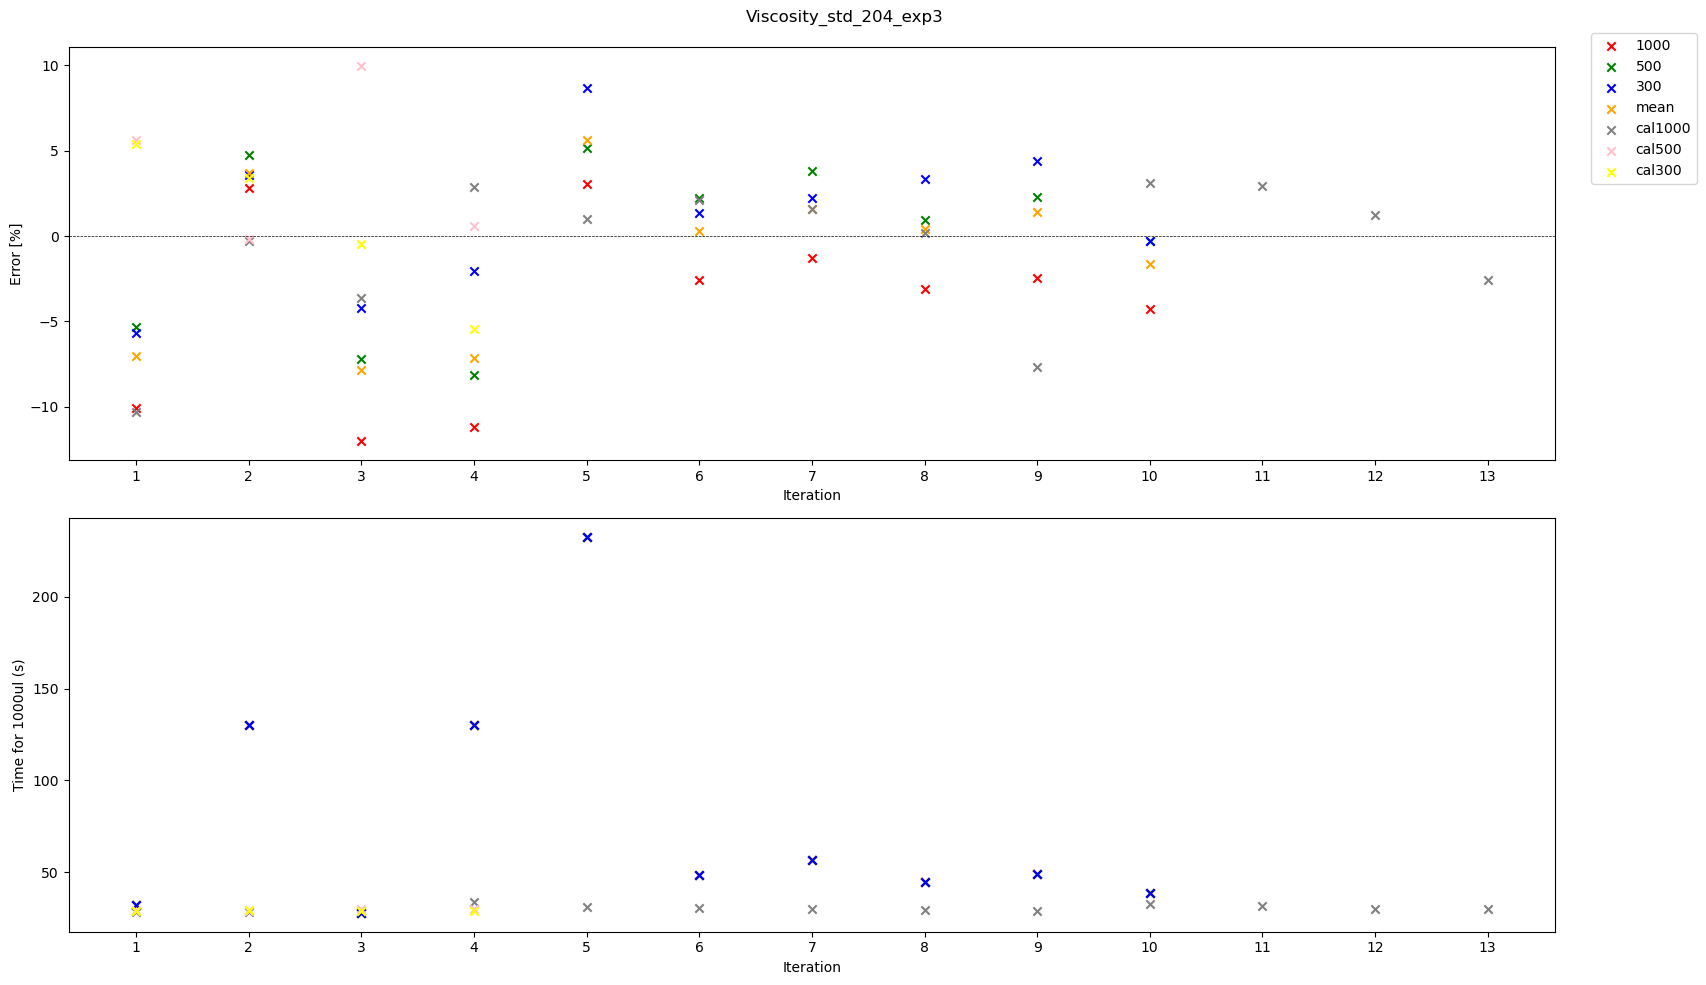

In [94]:
fig,axs = plt.subplots(2,1)

"""# Dropping NAN rows
df_cal_1000 = df_cal.where(df_cal.volume==1000).dropna(how='all')
df_cal_500 = df_cal.where(df_cal.volume==500).dropna(how='all')
df_cal_300 = df_cal.where(df_cal.volume==300).dropna(how='all')
df_cal_100 = df_cal.where(df_cal.volume==100).dropna(how='all')"""

# Plotting graph 1: Iteration against error
axs[0].scatter(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
axs[0].scatter(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500', c = 'green')
axs[0].scatter(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300', c = 'blue')
axs[0].scatter(df_cal_mean['iteration'],df_cal_mean['%error'], marker= 'x', label = 'mean', c = 'orange')
axs[0].scatter(calibration_1000['iteration'],calibration_1000['%error'], marker= 'x', label = 'cal1000', c="grey")
axs[0].scatter(calibration_500['iteration'],calibration_500['%error'], marker= 'x', label = 'cal500', c="pink")
axs[0].scatter(calibration_300['iteration'],calibration_300['%error'], marker= 'x', label = 'cal300', c="yellow")

# Setting graph 1 labels
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

# Plotting graph 2: Iteration against Time
axs[1].scatter(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], marker= 'x', label = 'mean', c = 'orange')
axs[1].scatter(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', label = '1000', c = 'red')
axs[1].scatter(df_cal_500['iteration'],df_cal_500['time_for_1000'], marker= 'x', label = '500', c = 'green')
axs[1].scatter(df_cal_300['iteration'],df_cal_300['time_for_1000'], marker= 'x', label = '300', c = 'blue')
axs[1].scatter(calibration_1000['iteration'],calibration_1000['time_for_1000'], marker= 'x', label = 'cal1000', c="grey")
axs[1].scatter(calibration_500['iteration'],calibration_500['time_for_1000'], marker= 'x', label = 'cal500', c="pink")
axs[1].scatter(calibration_300['iteration'],calibration_300['time_for_1000'], marker= 'x', label = 'cal300', c="yellow")

# Setting graph 2 labels
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

#Formatting subplots
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig.set_size_inches(17, 10)
fig.suptitle('Viscosity_std_'+std+'_exp3')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')

folder1 = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Opentrons_experiments\BOTorch_optimization\VS_code_csv\graphs")
fig.savefig(folder1+r'/'+'Viscosity_std_'+std+'_updated_with_cali.png')
